<a href="https://colab.research.google.com/github/PondKann/AIprototype2022/blob/main/Could_DB_and_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install azure-data-tables

     |████████████████████████████████| 108 kB 9.1 MB/s 
     |████████████████████████████████| 85 kB 2.5 MB/s 
     |████████████████████████████████| 178 kB 54.1 MB/s 
     |████████████████████████████████| 41 kB 512 kB/s 


# Azure Table 

In [ ]:
from azure.data.tables import TableServiceClient
from azure.data.tables import TableEntity

In [ ]:
table_service = TableServiceClient.from_connection_string(conn_str='DefaultEndpointsProtocol=https;AccountName=pondaiprototype;AccountKey=FxgRRzZV8UHdlKIHod1v6nEek+HwmB0u/idvPBBOCi2kzFG9i2GYHfoZECi3ZIGAgkuZs3LkhqaQ/Mf0Llyohg==;EndpointSuffix=core.windows.net')

# Insert data

In [ ]:
table_client = table_service.get_table_client(table_name="testdb")

In [ ]:
task = TableEntity()                            #ตัวเตรียมแถว
task[u'PartitionKey'] = u'part1'            # แบ่งพาร์ทของ data 
task[u'RowKey'] = u'001'                    #'002' ห้ามซ้ำ   id ของแต่ละแถว 
task[u'description'] = u'stat'
task[u'age'] = 30
table_client.create_entity(task)

{'date': datetime.datetime(2022, 2, 8, 2, 46, 11, tzinfo=datetime.timezone.utc),
 'etag': 'W/"datetime\'2022-02-08T02%3A46%3A12.4614527Z\'"',
 'version': '2019-02-02'}

In [ ]:
task = {u'PartitionKey': u'part1', u'RowKey': u'002',
        u'name': u'python', u'room': 'online',u'age':14}
table_client.create_entity(entity=task)

{'date': datetime.datetime(2022, 2, 8, 3, 10, 47, tzinfo=datetime.timezone.utc),
 'etag': 'W/"datetime\'2022-02-08T03%3A10%3A48.8485321Z\'"',
 'version': '2019-02-02'}

# Query

## query by PartitionKey and RowKey

In [ ]:
table_client = table_service.get_table_client(table_name="testdb")

In [ ]:
for i in range(10):
    task = {u'PartitionKey': u'partQ1', u'RowKey': f'00{i+10}',
        u'name': u'python', u'room': u'online',u'age': i }
    table_client.create_entity(entity=task)

In [ ]:
tasks = table_client.query_entities(query_filter="age gt 10")
print(tasks)

<iterator object azure.core.paging.ItemPaged at 0x7fa20286fdd0>


In [ ]:
for t in tasks:
    print(t)

{'PartitionKey': 'part1', 'RowKey': '001', 'description': 'stat', 'age': 30}
{'PartitionKey': 'part1', 'RowKey': '002', 'name': 'python', 'room': 'online', 'age': 14}
{'PartitionKey': 'part1', 'RowKey': '003', 'name': 'stat', 'age': 30}
{'PartitionKey': 'part1', 'RowKey': '004', 'name': 'stat', 'age': 30}
{'PartitionKey': 'part4', 'RowKey': '004', 'description': 'start4', 'age': 22}
{'PartitionKey': 'part5', 'RowKey': '011', 'name': 'Moltira', 'age': 30}
{'PartitionKey': 'part6', 'RowKey': '012', 'name': 'python4', 'room': 'online', 'age': 30}


# cloud AI

In [ ]:
pip install azure-cognitiveservices-vision-computervision

In [ ]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials


credentials = CognitiveServicesCredentials('1e39933e32bc4ba2900a93536bb26658')
client = ComputerVisionClient(
    endpoint="https://southeastasia.api.cognitive.microsoft.com/",
    credentials=credentials
)

In [ ]:
url = "https://pondaiprototype.blob.core.windows.net/pics/1100.jpg"

image_analysis = client.analyze_image(url,visual_features=[VisualFeatureTypes.faces])

for tag in image_analysis.faces:
    print(tag)

{'additional_properties': {}, 'age': 28, 'gender': <Gender.male: 'Male'>, 'face_rectangle': <azure.cognitiveservices.vision.computervision.models._models_py3.FaceRectangle object at 0x7fa1f95c2610>}


In [ ]:
tag.age

28

In [ ]:
print(tag.face_rectangle.height, tag.face_rectangle.width, 
      tag.face_rectangle.top, tag.face_rectangle.left)

173 173 171 500


In [ ]:
import cv2
import matplotlib.pyplot as plt

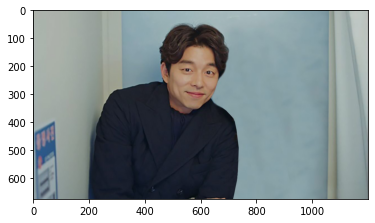

In [ ]:
img = cv2.imread('/content/1100.jpg')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
img2 = cv2.rectangle(img, (tag.face_rectangle.left,tag.face_rectangle.top),
                   (tag.face_rectangle.left+tag.face_rectangle.width,tag.face_rectangle.top+tag.face_rectangle.height),(0,0,255),5)

28
Gender.male


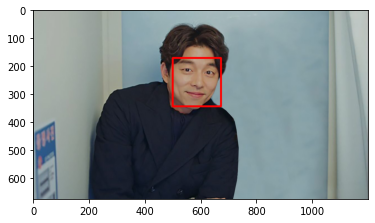

In [ ]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
print(tag.age)
print(tag.gender)